# Analisis Pippo, armando un unico DataFrame


## Obtención de los datos y librerías necesarias.

In [1]:
# Importamos las librerías que usaremos:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import scipy.stats as sts
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from IPython.display import display
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime

from datetime import date
import calendar

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Importamos las librerias que usaremos para el ploteo:
import geopandas as gpd
from shapely.geometry import Point, Polygon

import shapely.speedups
shapely.speedups.enable()

In [2]:
# time function using .time methods for later comparison
from timeit import default_timer as timer
start_ay = timer()

In [3]:
#Modifico los parametros preseteados para ver todas las columnas

pd.options.display.max_columns = None

#Modifico los parametros preseteados para ver todas las filas

pd.options.display.max_rows = 20

In [4]:
# Importamos los dataset
df = pd.read_csv('Pippo_tot_lin.csv',parse_dates=['OrderDate'])
df.drop('Unnamed: 0', axis=1, inplace=True)

## Analizo que valores hay en columnas

In [5]:
df.shape

(452063, 34)

In [6]:
df.columns

Index(['OrderId', 'Id', 'ProductId', 'ProductLine', 'ProductType', 'Name',
       'Quantity', 'Price', 'ListPrice', 'PromoName', 'RawItemDiscount',
       'GrossItemAmountDiscount', 'TotalOrderGross', 'TotalDiscountPrice',
       'ShippingCost', 'Value', 'DocumentType', 'Documento', 'OrderDate',
       'Complemet', 'SelectedAddressComplement', 'AddressType', 'Country',
       'State', 'City', 'Neighborhood', 'SelectedAddressNeighborhood',
       'Street', 'PostalCode', 'SelectedAddressPostalCode',
       'SelectedAddressReference', 'Lat', 'Lng', 'HostName'],
      dtype='object')

In [7]:
df.groupby(['ProductLine', 'ProductType']).agg({'Quantity': 'count', 'Price': 'sum'})

Quantity         Price
ProductLine   ProductType                                
Accesorios    Alfombras                2035  1.652559e+06
              Almohadones             56405  4.402606e+07
              Aromatizadores           3177  1.462687e+06
              Muebles                  1186  7.234040e+05
              Velas                     106  8.143500e+04
Aire Libre    Lonas                    1389  1.153371e+06
              Sillas                    677  1.478281e+06
Baño          Accesorios               4517  2.955871e+06
              Jabones y Jaboneras       636  2.391340e+05
              Toallas y Toallones     65977  4.316109e+07
...                                     ...           ...
Dormitorio    Almohadas               14175  1.261722e+07
              Bebé                      290  3.014580e+05
              Cama                     7438  7.947042e+06
              Sábanas                152970  2.691410e+08
Organizadores Cajas y Cajones           677  3.336140e+05
              Guardado                 2443  3.194261e+06
              Placard                  3079  2.013546e+06
Ropa          Para Dormir              3148  4.208884e+06
              Para Trabajo              754  1.739820e+05
              Para Uso                 1529  7.455590e+05

[29 rows x 2 columns]

In [8]:
df.shape

(452063, 34)

In [9]:
df.AddressType.value_counts()

residential    266561
pickup         185389
commercial        113
Name: AddressType, dtype: int64

In [10]:
# Desde donde se realizan compras, pais, state, city y barrio
df.Country.value_counts()

ARG    426040
URY     26016
ESP         4
ITA         3
Name: Country, dtype: int64

In [11]:
# Dropeo ITA y ESP

df.drop(df[df.Country == 'ITA'].index, inplace=True)
df.drop(df[df.Country == 'ESP'].index, inplace=True)

In [12]:
# Hay 2 tipos de documentos segun pais, pero dividi en 3 por DNI Argentino 1 nacionales, 2 extranjeros en Arg. y 3 Uruguay
df.DocumentType.value_counts()

dni1    416438
dni3     26013
dni2      9605
Name: DocumentType, dtype: int64

In [13]:
a = df.DocumentType == 'dni1'
b = df.DocumentType == 'dni2'
c = df.DocumentType == 'dni3'

In [14]:
# Personas unicas con DNI argentinos 
df.Documento[a].nunique()

127952

In [15]:
# Personas unicas con DNI argentino pero siendo extranjeros 
df.Documento[b].nunique()

3134

In [16]:
# Personas unicas con DNI uruguayos 
df.Documento[c].nunique()

8240

In [17]:
# Para ver cuantas compras por ducumento (son registros, productos. Facturas (OrdenID) son menos)
a = df.Documento.value_counts()

In [18]:
tmp = pd.DataFrame(a)
tmp.head(10)

,Documento
225,448
1008,126
6298,118
14455,98
8055,90
10559,87
31849,83
12010,75
310,70
7440,68


In [19]:
sum(df.Documento == 225)

448

In [20]:
a = df.Documento == 6298
a.sum()

118

In [21]:
a = df.Documento == 615
a.sum()

62

In [22]:
df.Quantity.value_counts()

1     392763
2      49510
3       4858
4       3109
6       1105
5        516
10        68
8         66
7         54
9          6
20         1
Name: Quantity, dtype: int64

In [23]:
df.State.value_counts()

Buenos Aires                         89644
BUENOS AIRES                         80396
Ciudad Autónoma de Buenos Aires      72549
CIUDAD AUTÓNOMA DE BUENOS AIRES      42707
Córdoba                              16414
Montevideo                           14377
Santa Fe                             14214
SANTA FE                             14161
CÓRDOBA                              12326
TUCUMÁN                               6076
                                     ...  
CAP. FEDERAL                             4
CBA                                      4
PROVINCIA DE BUENOS AIRES                3
BS.AS.                                   3
BSAS                                     3
BUENOS AIRES PDO GENERAL VILLEGAS        3
3400                                     3
BA                                       1
D                                        1
BS.AS                                    1
Name: State, Length: 123, dtype: int64

In [24]:
df.City.value_counts()

Ciudad Autónoma de Buenos Aires    76102
Ciudad Autónoma Buenos Aires       41632
La Plata                           25484
Córdoba                            19552
Mar Del Plata                      19080
Rosario                            17488
Montevideo                         17159
Martínez                           10761
San Miguel De Tucumán               7716
Morón                               7024
                                   ...  
Guaraní                                1
Igarzabal                              1
Covunco Centro                         1
Monroe                                 1
Campo Largo                            1
Agustin Roca                           1
RECOLETA                               1
San Antonio                            1
Holmberg                               1
VILLA GESELL                           1
Name: City, Length: 2027, dtype: int64

In [25]:
df.Neighborhood.value_counts()

San Nicolas             15260
Almagro                 10878
Recoleta                10609
Belgrano                10105
Colegiales               8881
Centro                   8007
Caballito                7385
Monserrat                3560
Palermo                  3511
Sarmiento                3259
                        ...  
SOLEDAD                     1
REMEDIOS DE ESCALADS        1
ACASSUSO                    1
LOS MORROS                  1
UPCN DE 7 Y 89              1
Parada Robles               1
JFJF                        1
LOMAS DEL MIRADOR           1
VILLA INDUSTRIALES          1
VILLA ITALIA                1
Name: Neighborhood, Length: 618, dtype: int64

In [26]:
#Corrijo los nombres de las provincias:

#Luego lo moveré al notebook de limpieza.

df.loc[df['State'] == 'B', 'State'] = 'Buenos Aires'
df.loc[df['State'] == 'C', 'State'] = 'Buenos Aires'
df.loc[df['State'] == 'D', 'State'] = 'Buenos Aires'
df.loc[df['State'] == 'CAPITAL FEDERAL', 'State'] = 'Buenos Aires'
df.loc[df['State'] == 'CAP. FEDERAL', 'State'] = 'Buenos Aires'
df.loc[df['State'] == 'E.RIOS', 'State'] = 'Entre Ríos'
df.loc[df['State'] == 'E RIOS', 'State'] = 'Entre Ríos'
df.loc[df['State'] == 'S', 'State'] = 'Santa Fé'
df.loc[df['State'] == 'X', 'State'] = 'Córdoba'
df.loc[df['State'] == 'T', 'State'] = 'Tucumán'
df.loc[df['State'] == 'H', 'State'] = 'Chaco'
df.loc[df['State'] == 'M', 'State'] = 'Mendoza'
df.loc[df['State'] == 'Q', 'State'] = 'Neuquén'
df.loc[df['State'] == 'G', 'State'] = 'Santiago Del Estero'
df.loc[df['State'] == 'Y', 'State'] = 'Jujuy'
df.loc[df['State'] == '3400', 'State'] = 'Corrientes'
df.loc[df['State'] == 'TIERRA DEL FUEGO', 'State'] = 'Tierra del Fuego'

In [27]:
# nombre del producto a comprar
df.Name.nunique()

3954

In [28]:
df.Name.value_counts()

Juego de Toalla y Toallón Línea Turbat Color Gris Claro             3703
Juego de Toalla y Toallón Línea Turbat Color Blanco                 2153
Juego de Toalla y Toallón Línea Turbat Color Azul Claro             2123
Almohada 1 Plaza Vellón Siliconado Color Blanco                     2050
Almohada 1 Plaza Vellón Color Blanco                                1983
Juego de Sábanas Queen Size Micro Hojas Finas Color Rosa Claro      1958
Juego de Sábanas Queen Size Micro Fantasía Color Blanco             1823
Almohadón Yute Frases Color Beige                                   1797
Juego de Sábanas Queen Size Micro Pétalos Color Azul Claro          1518
Juego de Toalla y Toallón Línea Turbat Color Rosa                   1512
                                                                    ... 
Funda de Almohadón Presillas Color Amarillo                            1
Tatami Urbano Color Negro                                              1
Set de Cuatro Sillas Eames Color Blanco            

In [29]:
a = df.groupby('Id')['ProductId'].count()
a

Id
3       167
4        39
6        87
8        12
9        12
10        3
11      328
12      156
13      616
20      134
       ... 
5125      9
5127     16
5128     14
5129     18
5130      3
5131      4
5134      1
5138      3
5149     18
5189      1
Name: ProductId, Length: 4100, dtype: int64

In [30]:
# Identificando codigos
df.Name[df.ProductId == 1930]

0              Juego de Toalla y Toallón Liso Color Blanco
335              Juego de Toalla y Toallón Liso Color Rosa
403              Juego de Toalla y Toallón Liso Color Rosa
964            Juego de Toalla y Toallón Liso Color Blanco
990       Juego de Toalla y Toallón Liso Color Verde Claro
1224           Juego de Toalla y Toallón Liso Color Blanco
1225           Juego de Toalla y Toallón Liso Color Blanco
1590       Juego de Toalla y Toallón Liso Color Gris Claro
1591       Juego de Toalla y Toallón Liso Color Gris Claro
1713           Juego de Toalla y Toallón Liso Color Blanco
                                ...                       
449467    Juego de Toalla y Toallón Liso Color Verde Claro
450028         Juego de Toalla y Toallón Liso Color Blanco
450061         Juego de Toalla y Toallón Liso Color Blanco
450078           Juego de Toalla y Toallón Liso Color Rosa
450082     Juego de Toalla y Toallón Liso Color Gris Claro
450216         Juego de Toalla y Toallón Liso Color Blan

In [31]:
df.Name[df.Id == 3483]

0         Juego de Toalla y Toallón Liso Color Blanco
964       Juego de Toalla y Toallón Liso Color Blanco
1224      Juego de Toalla y Toallón Liso Color Blanco
1225      Juego de Toalla y Toallón Liso Color Blanco
1713      Juego de Toalla y Toallón Liso Color Blanco
1714      Juego de Toalla y Toallón Liso Color Blanco
3181      Juego de Toalla y Toallón Liso Color Blanco
3638      Juego de Toalla y Toallón Liso Color Blanco
3792      Juego de Toalla y Toallón Liso Color Blanco
3793      Juego de Toalla y Toallón Liso Color Blanco
                             ...                     
447296    Juego de Toalla y Toallón Liso Color Blanco
447751    Juego de Toalla y Toallón Liso Color Blanco
448508    Juego de Toalla y Toallón Liso Color Blanco
448598    Juego de Toalla y Toallón Liso Color Blanco
449095    Juego de Toalla y Toallón Liso Color Blanco
449096    Juego de Toalla y Toallón Liso Color Blanco
450028    Juego de Toalla y Toallón Liso Color Blanco
450061    Juego de Toalla y 

In [32]:
df.Name[df.Id == 5]

Series([], Name: Name, dtype: object)

In [33]:
df.loc[326]

OrderId                                                          863990124782-01
Id                                                                           279
ProductId                                                                    211
ProductLine                                                           Dormitorio
ProductType                                                Acolchados y Frazadas
Name                                 Cubrecama Queen Size Piqué Color Gris Claro
Quantity                                                                       1
Price                                                                       2999
ListPrice                                                                   2999
PromoName                      discount@shipping-40c34184-f75c-45e7-a4d5-e4e2...
                                                     ...                        
City                                                                  Río Cuarto
Neighborhood                

## En que fechas se realizan compras

In [34]:
df.groupby(['OrderDate']).agg({'Quantity': 'count', 'Price': 'sum'})

,Quantity,Price
OrderDate,,
2018-04-04,99,77095.5
2018-04-05,24,19987.8
2018-04-06,61,39570.8
2018-04-07,178,113689.8
2018-04-08,154,117135.9
2018-04-09,279,246415.7
2018-04-10,340,250393.2
2018-04-11,230,190449.4
2018-04-12,203,162761.5


In [35]:
# Obtenemos de la fecha el año, mes y dia de semana

df["año"] = df['OrderDate'].dt.year
df["mes"] = df['OrderDate'].dt.month
df['dia'] = df['OrderDate'].dt.weekday
df['dia_name'] = df['OrderDate'].dt.weekday_name
#{0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [36]:
df[{'dia', 'dia_name'}].sample(5)

,dia,dia_name
346388,3,Thursday
24984,1,Tuesday
361890,4,Friday
338942,6,Sunday
415104,5,Saturday


In [37]:
df.groupby(['año', 'mes']).agg({'Quantity': 'count', 'Price': 'sum'})

Quantity         Price
año  mes                        
2018 4        5386  5.067403e+06
     5       63115  8.018808e+07
     6       20010  2.593995e+07
     7       21004  2.410894e+07
     8       29495  3.606089e+07
     9       19983  2.947806e+07
     10      48875  7.191820e+07
     11      37497  5.055583e+07
     12      26135  3.524941e+07
2019 1       21481  3.109185e+07
     2       21814  2.913864e+07
     3       21947  3.038372e+07
     4       11322  1.862078e+07
     5       76770  1.393015e+08
     6       27222  4.470566e+07

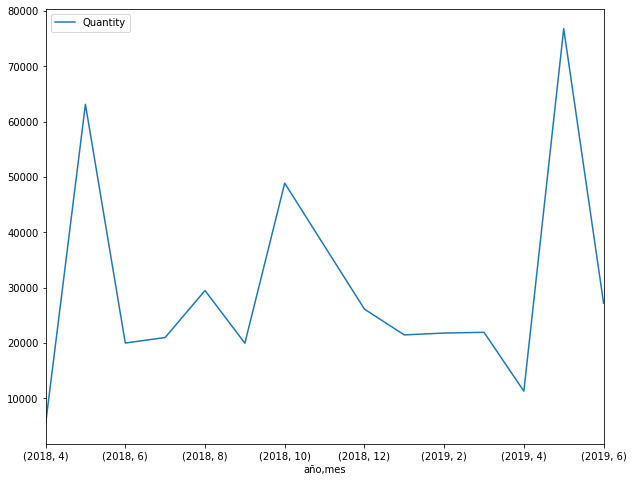

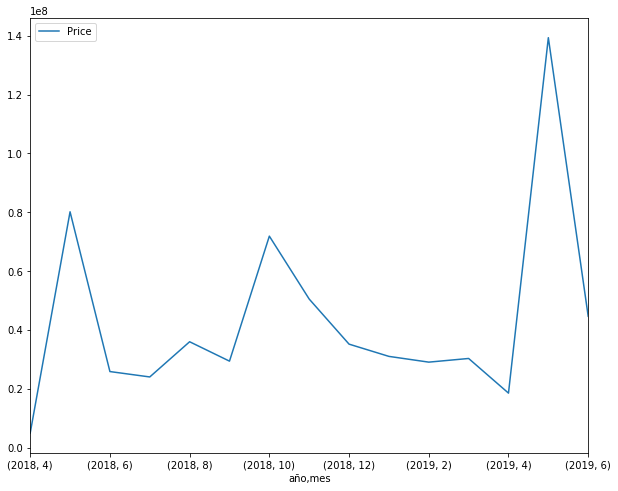

In [38]:
# graficando 

plot = df.groupby(['año', 'mes']).agg({'Quantity': 'count'}).plot(figsize=(10, 8))
plot = df.groupby(['año', 'mes']).agg({'Price': 'sum'}).plot(figsize=(10, 8))

In [39]:
df.groupby(['dia', 'dia_name']).agg({'Quantity': 'count', 'Price': 'sum'})

,,Quantity,Price
dia,dia_name,,
0,Monday,97127,1.421943e+08
1,Tuesday,89269,1.276074e+08
2,Wednesday,83411,1.232771e+08
3,Thursday,59052,8.529000e+07
4,Friday,57796,8.060857e+07
5,Saturday,34574,4.847697e+07
6,Sunday,30827,4.435453e+07


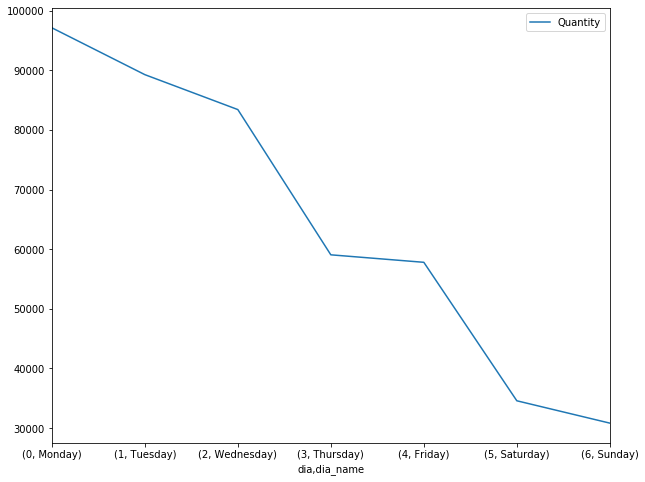

In [40]:
plot = df.groupby(['dia', 'dia_name']).agg({'Quantity': 'count'}).plot(figsize=(10, 8))

In [41]:
df.columns

Index(['OrderId', 'Id', 'ProductId', 'ProductLine', 'ProductType', 'Name',
       'Quantity', 'Price', 'ListPrice', 'PromoName', 'RawItemDiscount',
       'GrossItemAmountDiscount', 'TotalOrderGross', 'TotalDiscountPrice',
       'ShippingCost', 'Value', 'DocumentType', 'Documento', 'OrderDate',
       'Complemet', 'SelectedAddressComplement', 'AddressType', 'Country',
       'State', 'City', 'Neighborhood', 'SelectedAddressNeighborhood',
       'Street', 'PostalCode', 'SelectedAddressPostalCode',
       'SelectedAddressReference', 'Lat', 'Lng', 'HostName', 'año', 'mes',
       'dia', 'dia_name'],
      dtype='object')

In [42]:
df.State.value_counts()
#Length: 129

Buenos Aires                         94365
BUENOS AIRES                         80396
Ciudad Autónoma de Buenos Aires      72549
CIUDAD AUTÓNOMA DE BUENOS AIRES      42707
Córdoba                              16763
Montevideo                           14377
Santa Fe                             14214
SANTA FE                             14161
CÓRDOBA                              12326
TUCUMÁN                               6076
                                     ...  
BS. AS                                   4
BUENO AIRES                              4
BS. AS.                                  4
CBA                                      4
BUENOS AIRES PDO GENERAL VILLEGAS        3
PROVINCIA DE BUENOS AIRES                3
BS.AS.                                   3
BSAS                                     3
BA                                       1
BS.AS                                    1
Name: State, Length: 107, dtype: int64

In [43]:
BUENOSAIRES = df[df["State"].str.contains(r"(BUENOS AIRES|BSAS|BA|BS. AS.|BUENO AIRES|BS.AS.|BS. AS|CBA|BS.AS)", flags=re.I, regex=True)]
indexes = list(BUENOSAIRES.index)
df.loc[indexes,"State"] = "Buenos Aires"
SANTAFE = df[df["State"].str.contains(r"(Santa Fe|Santa Fé)", flags=re.I, regex=True)]
indexesa = list(SANTAFE.index)
df.loc[indexesa,"State"] = "Santa Fé"
TUCUMAN = df[df["State"].str.contains(r"(Tucuman|Tucumán)", flags=re.I, regex=True)]
indexesb = list(TUCUMAN.index)
df.loc[indexesb,"State"] = "Tucumán"
MONTEVIDEO = df[df["State"].str.contains(r"Montevideo", flags=re.I, regex=True)]
indexesc = list(MONTEVIDEO.index)
df.loc[indexesc,"State"] = "Montevideo"
ENTRERIOS = df[df["State"].str.contains(r"(Entre Rios|Entre Ríos)", flags=re.I, regex=True)]
indexesd = list(ENTRERIOS.index)
df.loc[indexesd,"State"] = "Entre Ríos"
CHUBUT = df[df["State"].str.contains(r"Chubut", flags=re.I, regex=True)]
indexese = list(CHUBUT.index)
df.loc[indexese,"State"] = "Chubut"
RIONEGRO = df[df["State"].str.contains(r"(Rio Negro|Río Negro)", flags=re.I, regex=True)]
indexesf = list(RIONEGRO.index)
df.loc[indexesf,"State"] = "Río Negro"
MENDOZA = df[df["State"].str.contains(r"Mendoza", flags=re.I, regex=True)]
indexesg = list(MENDOZA.index)
df.loc[indexesg,"State"] = "Mendoza"
CORRIENTES = df[df["State"].str.contains(r"Corrientes", flags=re.I, regex=True)]
indexesh = list(CORRIENTES.index)
df.loc[indexesh,"State"] = "Corrientes"
CHACO = df[df["State"].str.contains(r"Chaco", flags=re.I, regex=True)]
indexesi = list(CHACO.index)
df.loc[indexesi,"State"] = "Chaco"
NEUQUÉN = df[df["State"].str.contains(r"(Neuquen|Neuquén)", flags=re.I, regex=True)]
indexesj = list(NEUQUÉN.index)
df.loc[indexesj,"State"] = "Neuquén"
SALTA = df[df["State"].str.contains(r"Salta", flags=re.I, regex=True)]
indexesk = list(SALTA.index)
df.loc[indexesk,"State"] = "Salta"
LAPAMPA = df[df["State"].str.contains(r"La Pampa", flags=re.I, regex=True)]
indexesl = list(LAPAMPA.index)
df.loc[indexesl,"State"] = "La Pampa"
MISIONES = df[df["State"].str.contains(r"Misiones", flags=re.I, regex=True)]
indexesm = list(MISIONES.index)
df.loc[indexesm,"State"] = "Misiones"
JUJUY = df[df["State"].str.contains(r"Jujuy", flags=re.I, regex=True)]
indexesn = list(JUJUY.index)
df.loc[indexesn,"State"] = "Jujuy"
SANTIAGODELESTERO = df[df["State"].str.contains(r"Santiago Del Estero", flags=re.I, regex=True)]
indexeso = list(SANTIAGODELESTERO.index)
df.loc[indexeso,"State"] = "Santiago Del Estero"
SANTACRUZ = df[df["State"].str.contains(r"Santa Cruz", flags=re.I, regex=True)]
indexesp = list(SANTACRUZ.index)
df.loc[indexesp,"State"] = "Santa Cruz"
SANLUIS = df[df["State"].str.contains(r"San Luis", flags=re.I, regex=True)]
indexesq = list(SANLUIS.index)
df.loc[indexesq,"State"] = "San Luis"
CATAMARCA = df[df["State"].str.contains(r"Catamarca", flags=re.I, regex=True)]
indexesr = list(CATAMARCA.index)
df.loc[indexesr,"State"] = "Catamarca"
FORMOSA = df[df["State"].str.contains(r"Formosa", flags=re.I, regex=True)]
indexess = list(FORMOSA.index)
df.loc[indexess,"State"] = "Formosa"
SANJUAN = df[df["State"].str.contains(r"San Juan", flags=re.I, regex=True)]
indexest = list(SANJUAN.index)
df.loc[indexest,"State"] = "San Juan"
CANELONES = df[df["State"].str.contains(r"Canelones", flags=re.I, regex=True)]
indexesu = list(CANELONES.index)
df.loc[indexesu,"State"] = "Canelones"
COLONIA = df[df["State"].str.contains(r"Colonia", flags=re.I, regex=True)]
indexesv = list(COLONIA.index)
df.loc[indexesv,"State"] = "Colonia"
LARIOJA = df[df["State"].str.contains(r"La Rioja", flags=re.I, regex=True)]
indexesw = list(LARIOJA.index)
df.loc[indexesw,"State"] = "La Rioja"
MALDONADO = df[df["State"].str.contains(r"Maldonado", flags=re.I, regex=True)]
indexesx = list(MALDONADO.index)
df.loc[indexesx,"State"] = "Maldonado"
SORIANO = df[df["State"].str.contains(r"Soriano", flags=re.I, regex=True)]
indexesy = list(SORIANO.index)
df.loc[indexesy,"State"] = "Soriano"

C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.
C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  del sys.path[0]
C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: This patte

In [44]:
df.State.value_counts()
#Length: 74

Buenos Aires      319365
Santa Fé           34917
Montevideo         17161
Tucumán            11059
Entre Ríos          7307
Mendoza             6178
Río Negro           5397
Chubut              5313
Chaco               4956
Neuquén             4801
                   ...  
Rivera                92
DURAZNO               89
CERRO LARGO           87
Treinta Y Tres        76
RIVERA                76
ARTIGAS               69
TACUAREMBÓ            66
TREINTA Y TRES        48
FLORES                25
Treinta y tres         8
Name: State, Length: 54, dtype: int64

In [45]:
df_cantidades = (df.groupby(['State'])['Quantity'].sum().sort_values(ascending=False))
print("TOP 10 PROVINCIAS CON MAYOR DEMANDA")
print(df_cantidades.head(10))

TOP 10 PROVINCIAS CON MAYOR DEMANDA
State
Buenos Aires    370166
Santa Fé         40934
Montevideo       20348
Tucumán          13795
Entre Ríos        8781
Mendoza           7481
Río Negro         6574
Chubut            6338
Chaco             6027
Neuquén           5626
Name: Quantity, dtype: int64


In [46]:
df_cantidades1 = df.groupby(["State","Name"])['Quantity'].sum()

#Vemos que productos son los más comprados en las 10 provincias que más demandan
df_cantidades1_buenosaires = df_cantidades1.agg(lambda x: x.loc["Buenos Aires"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Buenos Aires")
print(df_cantidades1_buenosaires.head(5))
print()
df_cantidades1_santafe = df_cantidades1.agg(lambda x: x.loc["Santa Fé"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Santa Fé")
print(df_cantidades1_santafe.head(5))
print()
df_cantidades1_montevideo = df_cantidades1.agg(lambda x: x.loc["Montevideo"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Montevideo")
print(df_cantidades1_montevideo.head(5))
print()
df_cantidades1_tucuman = df_cantidades1.agg(lambda x: x.loc["Tucumán"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Tucumán")
print(df_cantidades1_tucuman.head(5))
print()
df_cantidades1_entrerios = df_cantidades1.agg(lambda x: x.loc["Entre Ríos"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Entre Ríos")
print(df_cantidades1_entrerios.head(5))

TOP 5 productos más demandados en Buenos Aires
Name
Juego de Toalla y Toallón Línea Turbat Color Gris Claro    3261
Almohada 1 Plaza Vellón Color Blanco                       2666
Juego de Toalla y Toallón Línea Turbat Color Blanco        2291
Almohada 1 Plaza Vellón Siliconado Color Blanco            2069
Almohada 1 Plaza Espuma Microprocesada Color Blanco        1771
Name: Quantity, dtype: int64

TOP 5 productos más demandados en Santa Fé
Name
Juego de Toalla y Toallón Línea Turbat Color Gris Claro    345
Juego de Toalla y Toallón Línea Turbat Color Blanco        245
Almohada 1 Plaza Vellón Color Blanco                       233
Almohada 1 Plaza Espuma Microprocesada Color Blanco        209
Almohada 1 Plaza Vellón Siliconado Color Blanco            197
Name: Quantity, dtype: int64

TOP 5 productos más demandados en Montevideo
Name
Juego de Sábanas Queen Size Micro Geo Pastel Color Rosa Claro       162
Almohada 1 Plaza Vellón Color Blanco                                158
Juego de Sá

In [47]:
df_cantidades1 = df.groupby(["State","ProductType"])['Quantity'].sum()

#Vemos que productos son los más comprados en las 10 provincias que más demandan
df_cantidades1_buenosaires = df_cantidades1.agg(lambda x: x.loc["Buenos Aires"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Buenos Aires")
print(df_cantidades1_buenosaires.head(5))
print()
df_cantidades1_santafe = df_cantidades1.agg(lambda x: x.loc["Santa Fé"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Santa Fé")
print(df_cantidades1_santafe.head(5))
print()
df_cantidades1_montevideo = df_cantidades1.agg(lambda x: x.loc["Montevideo"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Montevideo")
print(df_cantidades1_montevideo.head(5))
print()
df_cantidades1_tucuman = df_cantidades1.agg(lambda x: x.loc["Tucumán"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Tucumán")
print(df_cantidades1_tucuman.head(5))
print()
df_cantidades1_entrerios = df_cantidades1.agg(lambda x: x.loc["Entre Ríos"]).sort_values(ascending=False)
print("TOP 5 productos más demandados en Entre Ríos")
print(df_cantidades1_entrerios.head(5))

TOP 5 productos más demandados en Buenos Aires
ProductType
Sábanas                  112779
Acolchados y Frazadas     65190
Toallas y Toallones       58069
Almohadones               55535
Mantelería                16296
Name: Quantity, dtype: int64

TOP 5 productos más demandados en Santa Fé
ProductType
Sábanas                  12982
Acolchados y Frazadas     8100
Toallas y Toallones       6223
Almohadones               5590
Mantelería                1804
Name: Quantity, dtype: int64

TOP 5 productos más demandados en Montevideo
ProductType
Sábanas                  5644
Acolchados y Frazadas    4336
Almohadones              3679
Toallas y Toallones      3093
Mantelería                894
Name: Quantity, dtype: int64

TOP 5 productos más demandados en Tucumán
ProductType
Sábanas                  3590
Acolchados y Frazadas    2553
Almohadones              2371
Toallas y Toallones      2263
Mantelería                809
Name: Quantity, dtype: int64

TOP 5 productos más demandados en Entre 

In [48]:
# Ahora ordenamos las columnas agrupandolas
df = df.reindex(columns = ['OrderId', 'Id', 'ProductId', 'ProductLine', 'ProductType', 'Name', 'Quantity', \
                           'Price', 'ListPrice', 'PromoName', 'RawItemDiscount', 'GrossItemAmountDiscount', \
                           'TotalOrderGross', 'TotalDiscountPrice', 'ShippingCost', 'Value', 'DocumentType', \
                           'Documento', 'OrderDate', 'año', 'mes', 'dia', 'dia_name', 'Complemet', 'SelectedAddressComplement', \
                           'AddressType', 'Country', 'State', 'City', 'Neighborhood', 'SelectedAddressNeighborhood', \
                           'Street', 'PostalCode', 'SelectedAddressPostalCode', 'SelectedAddressReference', \
                           'Lat', 'Lng', 'HostName'])

In [49]:
df.shape

(452056, 38)

In [50]:
df.to_csv("Pippo_tot_ana.csv")

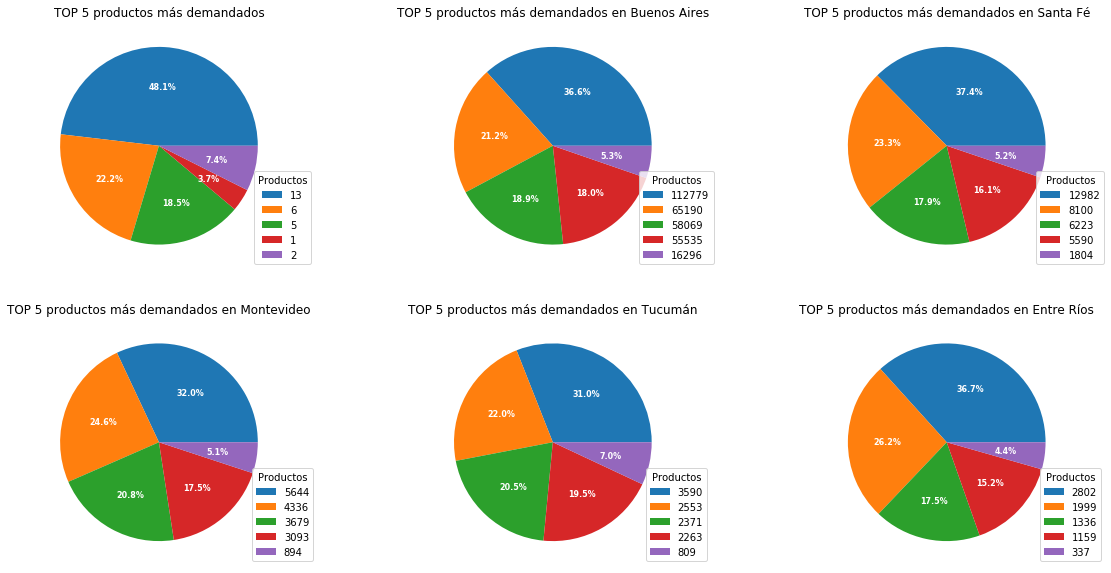

In [51]:
# Agrego Gráficos a lo analizado por zonas y productos:

#Defino los rangos de los gráficos:
a = df_cantidades1[0:5]
b = df_cantidades1_buenosaires[0:5]
c = df_cantidades1_santafe[0:5]
d = df_cantidades1_montevideo[0:5]
e = df_cantidades1_tucuman[0:5]
f = df_cantidades1_entrerios[0:5]

# Generamos el entorno de la figura
plt.figure(figsize=(20, 10))

# Dividimos el área en áreas de 3 filas x 3 columnas (grids)

# Forma de la grilla y posición del subplot
plt.subplot(231) # seleccionamos el #1 de la fila #1
wedges, texts, autotexts = plt.pie(a, autopct='%1.1f%%', textprops=dict(color="w"))
plt.legend(a, title="Productos", loc="lower center", bbox_to_anchor=(0.75, 0, 0.5, 0.5))
plt.setp(autotexts, size=8, weight="bold")
plt.title('TOP 5 productos más demandados')


plt.subplot(232) # seleccionamos el #2 de la fila #1
wedges, texts, autotexts = plt.pie(b, autopct='%1.1f%%', textprops=dict(color="w"))
plt.legend(b, title="Productos", loc="lower center", bbox_to_anchor=(0.75, 0, 0.5, 0.5))
plt.setp(autotexts, size=8, weight="bold")
plt.title('TOP 5 productos más demandados en Buenos Aires')


plt.subplot(233) # seleccionamos el #3 de la fila #1
wedges, texts, autotexts = plt.pie(c, autopct='%1.1f%%', textprops=dict(color="w"))
plt.legend(c, title="Productos", loc="lower center", bbox_to_anchor=(0.75, 0, 0.5, 0.5))
plt.setp(autotexts, size=8, weight="bold")
plt.title('TOP 5 productos más demandados en Santa Fé')

plt.subplot(234) # seleccionamos el #1 de la fila #2
wedges, texts, autotexts = plt.pie(d, autopct='%1.1f%%', textprops=dict(color="w"))
plt.legend(d, title="Productos", loc="lower center", bbox_to_anchor=(0.75, 0, 0.5, 0.5))
plt.setp(autotexts, size=8, weight="bold")
plt.title('TOP 5 productos más demandados en Montevideo')

plt.subplot(235) # seleccionamos el #2 de la fila #2
wedges, texts, autotexts = plt.pie(e, autopct='%1.1f%%', textprops=dict(color="w"))
plt.legend(e, title="Productos", loc="lower center", bbox_to_anchor=(0.75, 0, 0.5, 0.5))
plt.setp(autotexts, size=8, weight="bold")
plt.title('TOP 5 productos más demandados en Tucumán')

plt.subplot(236) # seleccionamos el #3 de la fila #2
wedges, texts, autotexts = plt.pie(f, autopct='%1.1f%%', textprops=dict(color="w"))
plt.legend(f, title="Productos", loc="lower center", bbox_to_anchor=(0.75, 0, 0.5, 0.5))
plt.setp(autotexts, size=8, weight="bold")
plt.title('TOP 5 productos más demandados en Entre Ríos')


plt.show()

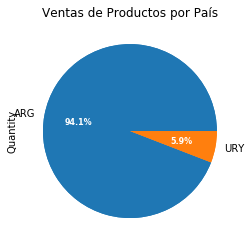

In [52]:
#Analizo ahora la composición por país:

df.groupby('Country')['Quantity'].sum().plot(kind='pie')

wedges, texts, autotexts = plt.pie(df.groupby('Country')['Quantity'].sum()
                                   , autopct='%1.1f%%', textprops=dict(color="w"))
plt.setp(autotexts, size=8, weight="bold")
plt.title('Ventas de Productos por País')
#plt.legend(loc="upper right")

plt.show()

## Analizaremos la información de ventas con perspectiva geográfica


In [53]:
# Importamos los datos de ventas

sales = df[['Lng' ,'Lat',  'OrderId', 'State', 'City', 'Country', 'Id', 'ProductId', 'ProductLine', 'ProductType', \
            'Quantity']]
#pd.read_csv('/content/drive/My Drive/Data Science/Desafios/Git/Testing/Pippo_tot.csv', usecols = ['Lng' ,'Lat',
#'OrderId', 'State', 'City', 'Country', 'Id', 'ProductId', 'ProductLine', 'ProductType', 'Quantity'])
sales = sales[sales['Country'] == 'ARG']

In [54]:
# Genero el mapa de Argentina desde el Mapa Mundial alojado en el dataset de Geopandas:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
AR = world[world.name == 'Argentina']
UY = world[world.name == 'Uruguay']

In [55]:
# Leo el mapa ( http://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG)

argentina_fp = 'provincia.geojson'
map_gdf = gpd.read_file(argentina_fp)
map_gdf = map_gdf [ map_gdf.NAM != 'Tierra del Fuego, Antártida e Islas del Atlántico Sur' ]

In [56]:
#Importamos el archivo de geolocalizaciones para reemplazar los outsiders de latitud y longitud

geo = pd.read_csv('AR.txt', header = None, sep="\t")

In [57]:
#Adecuamos el Dataframe de geolocalizaciones:

#Cambiamos el nombre de las columnas relevantes:
geo.rename(columns = {0:'geonameid',1:'City',4:'Lat',5:'Lng'}, inplace = True)

#Reducimos los valores decimales de latitud y longitud:
#geo['lat'] = pd.Series([round(val, 8) for val in geo['lat']], index = geo.index)
#geo['lng'] = pd.Series([round(val, 8) for val in geo['lng']], index = geo.index)

#Limpiamos el Dataframe de Geolocalizaciones eliminando las columnas que no contienen información relevante:
geo.drop([2,3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], axis=1, inplace=True)

In [58]:
#Genero máscaras para limpíar las latitudes en Cero:

mask1 = sales['Lat'] == 0
mask2 = sales['Lat'] != 0

In [59]:
#Creamos un diccionario para mapear latitudes en cero:
latitud_dict = {}

#Creamos una tupla con los pares de key y value
geoname_lat = zip(sales[mask2]['City'],sales[mask2]['Lat'])

#Rellenamos el diccionario
for geoname, latitud in geoname_lat:
    latitud_dict[geoname] = latitud

#Aplicamos el reemplazo:

sales.loc[(sales['Lat'] == 0) ,'Lat'] = sales['City'].map(latitud_dict)

In [60]:
#Creamos un diccionario para mapear longitudes en cero:
longitud_dict = {}

#Creamos una tupla con los pares de key y value
geoname_lng = zip(sales[mask2]['City'],sales[mask2]['Lng'])

#Rellenamos el diccionario
for geoname, longitud in geoname_lng:
    longitud_dict[geoname] = longitud
    
#Aplicamos el reemplazo:
sales.loc[(sales['Lng'] == 0),'Lng'] = sales['City'].map(longitud_dict)

In [61]:
#Genero un GeoDataFrame con el Dataset

#import geopandas as gpd

#from pyproj import Proj, transform
#gpd.geodataframe.GeoDataFrame

gdf = gpd.GeoDataFrame(sales, geometry=gpd.points_from_xy(sales.Lng, sales.Lat))

In [62]:
# Identificamos los puntos que se encuentran dentro del perimetro de Argentina

inside_point = AR

ar_map = inside_point
ar_map.reset_index(drop=True, inplace=True)

pip_mask = gdf.within(ar_map.loc[0, 'geometry'])

pip_gdf = gdf.loc[pip_mask]

In [63]:
pip_mask.value_counts()

True     388446
False     37594
dtype: int64

### Realizo la limpieza de geo-puntos con valores de latitud y longitud que mapean fuera del perimetro de Argentina, para corregir sus coordenadas erron

In [64]:
#Genero un Dataframe con los registros excluidos del perimetro de Argentina:

non_pip = sales.loc[~pip_mask]
non_pip.Lat = np.nan
non_pip.Lng = np.nan
del non_pip['geometry']
print(non_pip.shape)

C:\Users\hmarq\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(37594, 11)


In [65]:
#1er. Mapeo latitudes y longitudes aproximadas para corregir los errores

#1ra rueda de correcciones por City:

Lt = dict(zip(geo['City'],geo['Lat']))
non_pip['Lat'] = non_pip['Lat'].fillna(non_pip['City'].map(Lt))

Lg = dict(zip(geo['City'],geo['Lng']))
non_pip['Lng'] = non_pip['Lng'].fillna(non_pip['City'].map(Lg))

C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [66]:
#2do. Mapeo latitudes y longitudes aproximadas para corregir los errores

#2da rueda de correcciones (por State):

Lt = dict(zip(sales['State'],sales['Lat']))
non_pip['Lat'] = non_pip['Lat'].fillna(non_pip['State'].map(Lt))

Lg = dict(zip(sales['State'],sales['Lng']))
non_pip['Lng'] = non_pip['Lng'].fillna(non_pip['State'].map(Lg))


C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [67]:
#Genero un GeoDataFrame con el Dataset de Outsiders
non_pip_gdf = gpd.GeoDataFrame(
    non_pip, geometry=gpd.points_from_xy(non_pip.Lng, non_pip.Lat))

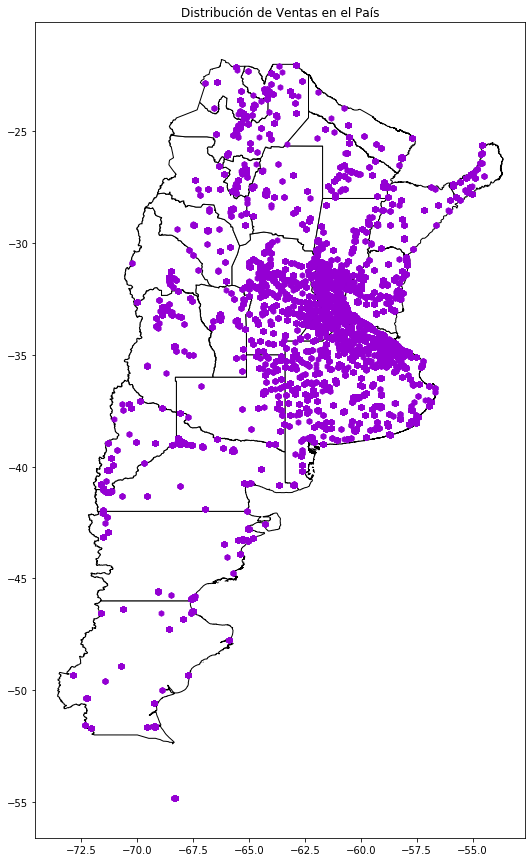

In [68]:
#Genero el mapa de Argentina desde el dataset de IGM (con división de provincias):


fig, ax = plt.subplots(figsize=(30, 15))
ax.set_aspect('equal')
ax = map_gdf.plot(ax=ax, color='white', edgecolor='black')
#ax = AR.plot(ax=ax, color='white', edgecolor='black')

#Ploteo de puntos de ventas
pip_gdf.plot(ax=ax,marker='h', color='darkviolet', markersize=30)
non_pip_gdf.plot(ax=ax,marker='h', color='darkviolet', markersize=30)
plt.title('Distribución de Ventas en el País')
plt.show()

C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\hmarq\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fut

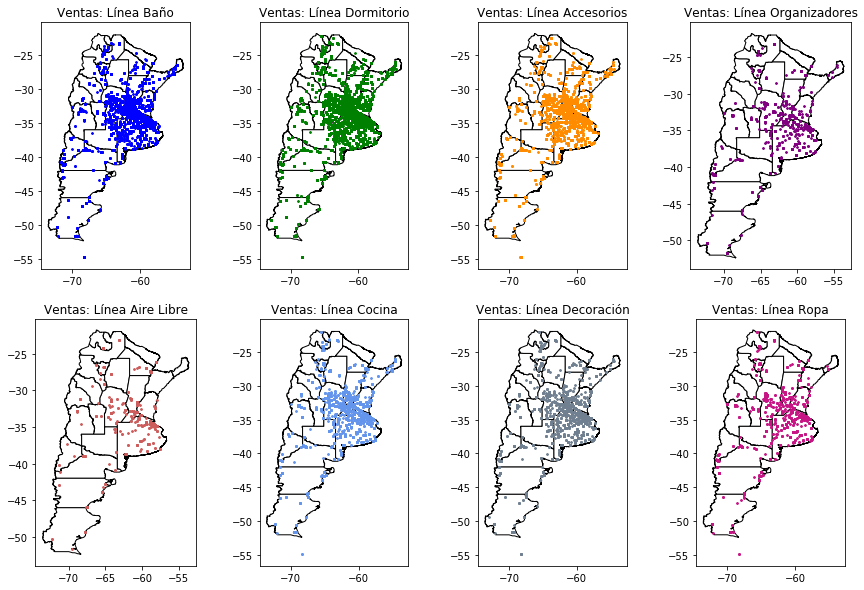

In [69]:
#Defino los rangos de los mapas:

a = pip_gdf[pip_gdf.ProductLine == 'Baño']
b = pip_gdf[pip_gdf.ProductLine == 'Dormitorio']
c = pip_gdf[pip_gdf.ProductLine == 'Accesorios']
d = pip_gdf[pip_gdf.ProductLine == 'Organizadores']
e = pip_gdf[pip_gdf.ProductLine == 'Aire Libre']
f = pip_gdf[pip_gdf.ProductLine == 'Cocina']
g = pip_gdf[pip_gdf.ProductLine == 'Decoración']
h = pip_gdf[pip_gdf.ProductLine == 'Ropa']

a1 = pip_gdf[pip_gdf.ProductLine == 'Baño']
b1 = pip_gdf[pip_gdf.ProductLine == 'Dormitorio']
c1 = pip_gdf[pip_gdf.ProductLine == 'Accesorios']
d1 = pip_gdf[pip_gdf.ProductLine == 'Organizadores']
e1 = pip_gdf[pip_gdf.ProductLine == 'Aire Libre']
f1 = pip_gdf[pip_gdf.ProductLine == 'Cocina']
g1 = pip_gdf[pip_gdf.ProductLine == 'Decoración']
h1 = pip_gdf[pip_gdf.ProductLine == 'Ropa']


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(241)
ax1 = fig.add_subplot(242)
ax2 = fig.add_subplot(243)
ax3 = fig.add_subplot(244)
ax4 = fig.add_subplot(245)
ax5 = fig.add_subplot(246)
ax6 = fig.add_subplot(247)
ax7 = fig.add_subplot(248)


# Forma de la grilla y posición del subplot
plt.subplot(241) # seleccionamos el #1 de la fila #1

ax.set_aspect('equal')
ax = map_gdf.plot(ax=ax, color='white', edgecolor='black')

#Ploteo de puntos de ventas
a.plot(ax=ax,marker='o', color='blue', markersize=2)
a1.plot(ax=ax,marker='o', color='blue', markersize=2)
ax.title.set_text('Ventas: Línea Baño')

plt.subplot(242) # seleccionamos el #2 de la fila #1

ax1.set_aspect('equal')
ax1 = map_gdf.plot(ax=ax1, color='white', edgecolor='black')

#Ploteo de puntos de ventas
b.plot(ax=ax1,marker='o', color='green', markersize=2)
b1.plot(ax=ax1,marker='o', color='green', markersize=2)
ax1.title.set_text('Ventas: Línea Dormitorio')

plt.subplot(243) # seleccionamos el #3 de la fila #1

ax2.set_aspect('equal')
ax2 = map_gdf.plot(ax=ax2, color='white', edgecolor='black')

#Ploteo de puntos de ventas
c.plot(ax=ax2,marker='o', color='darkorange', markersize=2)
c1.plot(ax=ax2,marker='o', color='darkorange', markersize=2)

ax2.title.set_text('Ventas: Línea Accesorios')

plt.subplot(244) # seleccionamos el #4 de la fila #1

ax3.set_aspect('equal')
ax3 = map_gdf.plot(ax=ax3, color='white', edgecolor='black')

#Ploteo de puntos de ventas
d.plot(ax=ax3,marker='o', color='purple', markersize=2)
d1.plot(ax=ax3,marker='o', color='purple', markersize=2)
ax3.title.set_text('Ventas: Línea Organizadores')

plt.subplot(245) # seleccionamos el #1 de la fila #2

ax4.set_aspect('equal')
ax4 = map_gdf.plot(ax=ax4, color='white', edgecolor='black')

#Ploteo de puntos de ventas
e.plot(ax=ax4,marker='o', color='indianred', markersize=2)
e1.plot(ax=ax4,marker='o', color='indianred', markersize=2)
ax4.title.set_text('Ventas: Línea Aire Libre')


plt.subplot(246) # seleccionamos el #2 de la fila #2

ax5.set_aspect('equal')
ax5 = map_gdf.plot(ax=ax5, color='white', edgecolor='black')

#Ploteo de puntos de ventas
f.plot(ax=ax5,marker='o', color='cornflowerblue', markersize=2)
f1.plot(ax=ax5,marker='o', color='cornflowerblue', markersize=2)
ax5.title.set_text('Ventas: Línea Cocina')


plt.subplot(247) # seleccionamos el #3 de la fila #2

ax6.set_aspect('equal')
ax6 = map_gdf.plot(ax=ax6, color='white', edgecolor='black')

#Ploteo de puntos de ventas
g.plot(ax=ax6,marker='o', color='slategray', markersize=2)
g1.plot(ax=ax6,marker='o', color='slategray', markersize=2)
ax6.title.set_text('Ventas: Línea Decoración')


plt.subplot(248) # seleccionamos el #4 de la fila #2

ax7.set_aspect('equal')
ax7 = map_gdf.plot(ax=ax7, color='white', edgecolor='black')

#Ploteo de puntos de ventas
h.plot(ax=ax7,marker='o', color='mediumvioletred', markersize=2)
h1.plot(ax=ax7,marker='o', color='mediumvioletred', markersize=2)
ax7.title.set_text('Ventas: Línea Ropa')

plt.show()

In [70]:
end_ay = timer()

In [71]:
# calcualte function runtime
time_ay = (end_ay - start_ay)/60

In [72]:
print (time_ay)

16.39615289915
